In [4]:
import urllib.request
import bs4
from bs4 import BeautifulSoup
import re
import json
from subprocess import check_output

In [5]:
url = "https://www.tesla.com/modely/design#overview"

In [6]:
response = urllib.request.urlopen(url)

In [14]:
with open("modely.html", "w") as f:
    f.write(response.read().decode())

In [15]:
with open("modely.html", "r") as f:
    html = f.read()

In [7]:
html = response.read().decode()

'<!DOCTYPE html>\n<html class="tds-theme--normal" lang=en >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n    <meta id="viewport-tag" name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1.0,maximum-scale=5.0" />\n    <meta name="keywords" content="Model Y, Tesla Model Y, design your Model Y, Tesla design, Tesla configurator, Tesla Design Studio, build a Model Y, Model Y specs, electric vehicle, electric car, order a Model Y, Model Y interior, Model Y exterior, Model Y storage, Model Y seating, Model Y performance" />\n<meta name="description" content="Design and order your Tesla Model Y, the car of the future." />\n\n<meta name="twitter:card" content="summary_large_image" />\n<meta name="twitter:description" content="Design and order your Tesla Model Y, the car of the future." />\n<meta name="twitter:title" content="Design Your Model Y | T
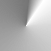

In [8]:
html

In [9]:
soup = bs4.BeautifulSoup(html)

<!DOCTYPE html>

<html class="tds-theme--normal" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<meta content="width=device-width, initial-scale=1, minimum-scale=1.0,maximum-scale=5.0" id="viewport-tag" name="viewport">
<meta content="Model Y, Tesla Model Y, design your Model Y, Tesla design, Tesla configurator, Tesla Design Studio, build a Model Y, Model Y specs, electric vehicle, electric car, order a Model Y, Model Y interior, Model Y exterior, Model Y storage, Model Y seating, Model Y performance" name="keywords"/>
<meta content="Design and order your Tesla Model Y, the car of the future." name="description"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="Design and order your Tesla Model Y, the car of the future." name="twitter:description"/>
<meta content="Design Your Model Y | Tesla" name="twitter:title"/>
<meta content="Design Your Mod
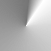

In [10]:
soup

In [64]:
script = soup.find('script', text=re.compile(r'dataJson'))

In [65]:
matches = re.finditer(r'const\s*\w*\s*=\s*\{.+?\};', script.text, re.DOTALL)

In [67]:
for match in matches:
    print(match.group(0))

const tslaObj = {"App":{"uiTheme":"normal","uiLocale":"en_US","uiCountry":"US","uiLanguage":"en","uiLanguageDirection":"LTR","availableLocales":{"USA":"en_US","Canada":["en_CA","fr_CA"],"Mexico":"es_MX","Puerto Rico":["es_PR","en_PR"],"United Arab Emirates":["en_AE","ar_AE"],"Israel":"he_IL","Belgium":["nl_BE","fr_BE"],"Germany":"de_DE","Spain":"es_ES","France":"fr_FR","Italy":"it_IT","Luxembourg":["de_LU","fr_LU"],"Netherlands":"nl_NL","Norway":"no_NO","Austria":"de_AT","Portual":"pt_PT","Switzerland":["de_CH","fr_CH","it_CH"],"Finland":"fi_FI","Sweden":"sv_SE","Czechia":"cs_CZ","Denmark":"da_DK","Greece":"el_GR","Croatia":"hr_HR","Iceland":"is_IS","Hungary":"hu_HU","Poland":"pl_PL","Romania":"ro_RO","Slovenia":"sl_SI","Great Britain":"en_GB","Ireland":"en_IE","Estonia":"en_EE","Slovakia":"en_SK","Lithuania":"en_LT","Latvia":"en_LV","China":"zh_CN","Hong Kong":["en_HK","zh_HK"],"Macau":["en_MO","zh_MO"],"Taiwan":"zh_TW","South Korea":"ko_KR","Japan":"ja_JP","Australia":"en_AU","New Ze

In [51]:
match_strings = []
for match in matches:
    match_strings.append(match.group())

concatenated_string = "\n".join(match_strings)

In [52]:
concatenated_string

'const dataJson = {\n            "DSServices": {"date":1672874889556,"KeyManager":{"keys":{"Lexicon":[{"key":"Lexicon.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Incentives":[{"key":"Incentives.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Fees":[{"key":"Fees.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWe

In [53]:
with open('temp.js', 'w') as f:
    f.write('window = {};\n' + concatenated_string + ';\nprocess.stdout.write(JSON.stringify(dataJson));')

In [54]:
window_init_state = check_output(['node','temp.js'])


In [59]:
json.loads(window_init_state.decode())

{'DSServices': {'date': 1672874889556,
  'KeyManager': {'keys': {'Lexicon': [{'key': 'Lexicon.my',
      'query': {'available_configurations': 'my:my',
       'language': 'en',
       'market': 'US',
       'app': 'find-my-tesla',
       'isTcoEnabled': False,
       'tags': '',
       'context': '',
       'version': 'redesign',
       'seekret': '',
       'isFinplatEnabled': '1',
       'isWechatMiniProgramEnv': '0',
       'isWechatBrowserEnv': '0',
       'isFeeSvcEnabled': '0',
       'model': 'my',
       'variant': 'my'}}],
    'Incentives': [{'key': 'Incentives.my.my',
      'query': {'available_configurations': 'my:my',
       'language': 'en',
       'market': 'US',
       'app': 'find-my-tesla',
       'isTcoEnabled': False,
       'tags': '',
       'context': '',
       'version': 'redesign',
       'seekret': '',
       'isFinplatEnabled': '1',
       'isWechatMiniProgramEnv': '0',
       'isWechatBrowserEnv': '0',
       'isFeeSvcEnabled': '0',
       'model': 'my',
   

In [ ]:
soup = bs4.BeautifulSoup(html)
with open('temp.js','w') as f:
    f.write('window = {};\n'+
            soup.find('script').text.strip()+
            ';\nprocess.stdout.write(JSON.stringify(window.__INITIAL_STATE__));')
window_init_state = check_output(['node','temp.js'])
print(json.loads(window_init_state))


In [104]:
soup = BeautifulSoup(html, 'html.parser')

In [105]:
script = soup.find('script', text=re.compile(r'dataJson'))

In [106]:
script

<script type="text/javascript">
        const dataJson = {
            "DSServices": {"date":1672874889556,"KeyManager":{"keys":{"Lexicon":[{"key":"Lexicon.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Incentives":[{"key":"Incentives.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Fees":[{"key":"Fees.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","se

In [125]:
###

## Find Regex that matches consts
Regex taht matches "const <RANDOM> = {" and "};"

In [107]:
matches = re.finditer(r'const\s*\w*\s*=\s*\{.+?\};', script.text, re.DOTALL)

In [102]:
for match in matches:
    print(re.sub(r'const\s*\w*\s*=\s*', '', match.group(0)).rstrip(";"))

{
            "DSServices": {"date":1672874889556,"KeyManager":{"keys":{"Lexicon":[{"key":"Lexicon.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Incentives":[{"key":"Incentives.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Fees":[{"key":"Fees.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv"

In [93]:
for match in matches:
    print(match.group(0))

In [108]:
dict_matches = [re.sub(r'const\s*\w*\s*=\s*', '', match.group(0)).rstrip(";") for match in matches]

In [109]:
dict_matches

['{\n            "DSServices": {"date":1672874889556,"KeyManager":{"keys":{"Lexicon":[{"key":"Lexicon.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Incentives":[{"key":"Incentives.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Fees":[{"key":"Fees.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramE

In [110]:
concat_dicts = ",".join(dict_matches)

In [111]:
concat_dicts

'{\n            "DSServices": {"date":1672874889556,"KeyManager":{"keys":{"Lexicon":[{"key":"Lexicon.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Incentives":[{"key":"Incentives.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Fees":[{"key":"Fees.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEn

In [113]:
with open('temp.js', 'w') as f:
    f.write('const teslaData = [' + concat_dicts + '];\nprocess.stdout.write(JSON.stringify(teslaData));')

In [114]:
window_init_state = check_output(['node','temp.js'])

In [115]:
window_init_state

b'[{"DSServices":{"date":1672874889556,"KeyManager":{"keys":{"Lexicon":[{"key":"Lexicon.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Incentives":[{"key":"Incentives.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Fees":[{"key":"Fees.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWec

In [122]:
teslaData = json.loads(window_init_state.decode())

In [123]:
with open('tesla_modely.json', 'w') as f:
    json.dump(teslaData, f)

In [124]:
####


In [102]:
test_sample = sample_dict.replace("\n", "", 1)

In [103]:
test_sample[::-1].replace("\n", "", 1)[::-1]

'{            "DSServices": {"date":1672703084295,"KeyManager":{"keys":{"Lexicon":[{"key":"Lexicon.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Incentives":[{"key":"Incentives.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Fees":[{"key":"Fees.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv"

In [15]:
sample_dict_no_n = sample_dict.replace("\n", "")

In [16]:
sample_dict_no_n

'{            "DSServices": {"date":1672702629357,"KeyManager":{"keys":{"Lexicon":[{"key":"Lexicon.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Incentives":[{"key":"Incentives.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Fees":[{"key":"Fees.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv"

In [17]:
test_1 = '"' + sample_dict + '"'

In [18]:
test_1[2]

'\n'

In [19]:
json.loads('"' + sample_dict + '"')

JSONDecodeError: Invalid control character at: line 1 column 3 (char 2)

In [20]:
sample_dict_json = json.dumps(sample_dict_no_n, indent=2)

In [21]:
sample_dict_json

'"{            \\"DSServices\\": {\\"date\\":1672702629357,\\"KeyManager\\":{\\"keys\\":{\\"Lexicon\\":[{\\"key\\":\\"Lexicon.my\\",\\"query\\":{\\"available_configurations\\":\\"my:my\\",\\"language\\":\\"en\\",\\"market\\":\\"US\\",\\"app\\":\\"find-my-tesla\\",\\"isTcoEnabled\\":false,\\"tags\\":\\"\\",\\"context\\":\\"\\",\\"version\\":\\"redesign\\",\\"seekret\\":\\"\\",\\"isFinplatEnabled\\":\\"1\\",\\"isWechatMiniProgramEnv\\":\\"0\\",\\"isWechatBrowserEnv\\":\\"0\\",\\"isFeeSvcEnabled\\":\\"0\\",\\"model\\":\\"my\\",\\"variant\\":\\"my\\"}}],\\"Incentives\\":[{\\"key\\":\\"Incentives.my.my\\",\\"query\\":{\\"available_configurations\\":\\"my:my\\",\\"language\\":\\"en\\",\\"market\\":\\"US\\",\\"app\\":\\"find-my-tesla\\",\\"isTcoEnabled\\":false,\\"tags\\":\\"\\",\\"context\\":\\"\\",\\"version\\":\\"redesign\\",\\"seekret\\":\\"\\",\\"isFinplatEnabled\\":\\"1\\",\\"isWechatMiniProgramEnv\\":\\"0\\",\\"isWechatBrowserEnv\\":\\"0\\",\\"isFeeSvcEnabled\\":\\"0\\",\\"model\\":\\"

In [22]:
with open('json_file.json', 'w') as f:
    f.write(sample_dict_json)

In [23]:
sample_dict_dict = json.loads(sample_dict_json)

In [24]:
dataJson_pattern = r'const dataJson = {(.*?)};'

In [25]:
tslaObj_pattern = r'const tslaObj = {(.*?)};'

In [26]:
match_dataJson = re.search(dataJson_pattern, script.text, re.DOTALL)

In [27]:
match_tslaObj = re.search(tslaObj_pattern, script.text, re.DOTALL)

In [28]:
if match_dataJson:
    print(match_dataJson.group(1))


            "DSServices": {"date":1672702629357,"KeyManager":{"keys":{"Lexicon":[{"key":"Lexicon.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Incentives":[{"key":"Incentives.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Fees":[{"key":"Fees.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":

In [32]:
if match_tslaObj:
    print(match_tslaObj.group(1))

"App":{"uiTheme":"normal","uiLocale":"en_US","uiCountry":"US","uiLanguage":"en","uiLanguageDirection":"LTR","availableLocales":{"USA":"en_US","Canada":["en_CA","fr_CA"],"Mexico":"es_MX","Puerto Rico":["es_PR","en_PR"],"United Arab Emirates":["en_AE","ar_AE"],"Israel":"he_IL","Belgium":["nl_BE","fr_BE"],"Germany":"de_DE","Spain":"es_ES","France":"fr_FR","Italy":"it_IT","Luxembourg":["de_LU","fr_LU"],"Netherlands":"nl_NL","Norway":"no_NO","Austria":"de_AT","Portual":"pt_PT","Switzerland":["de_CH","fr_CH","it_CH"],"Finland":"fi_FI","Sweden":"sv_SE","Czechia":"cs_CZ","Denmark":"da_DK","Greece":"el_GR","Croatia":"hr_HR","Iceland":"is_IS","Hungary":"hu_HU","Poland":"pl_PL","Romania":"ro_RO","Slovenia":"sl_SI","Great Britain":"en_GB","Ireland":"en_IE","Estonia":"en_EE","Slovakia":"en_SK","Lithuania":"en_LT","Latvia":"en_LV","China":"zh_CN","Hong Kong":["en_HK","zh_HK"],"Macau":["en_MO","zh_MO"],"Taiwan":"zh_TW","South Korea":"ko_KR","Japan":"ja_JP","Australia":"en_AU","New Zealand":"en_NZ","S

In [39]:
match_tslaObj.group(1)

'"App":{"uiTheme":"normal","uiLocale":"en_US","uiCountry":"US","uiLanguage":"en","uiLanguageDirection":"LTR","availableLocales":{"USA":"en_US","Canada":["en_CA","fr_CA"],"Mexico":"es_MX","Puerto Rico":["es_PR","en_PR"],"United Arab Emirates":["en_AE","ar_AE"],"Israel":"he_IL","Belgium":["nl_BE","fr_BE"],"Germany":"de_DE","Spain":"es_ES","France":"fr_FR","Italy":"it_IT","Luxembourg":["de_LU","fr_LU"],"Netherlands":"nl_NL","Norway":"no_NO","Austria":"de_AT","Portual":"pt_PT","Switzerland":["de_CH","fr_CH","it_CH"],"Finland":"fi_FI","Sweden":"sv_SE","Czechia":"cs_CZ","Denmark":"da_DK","Greece":"el_GR","Croatia":"hr_HR","Iceland":"is_IS","Hungary":"hu_HU","Poland":"pl_PL","Romania":"ro_RO","Slovenia":"sl_SI","Great Britain":"en_GB","Ireland":"en_IE","Estonia":"en_EE","Slovakia":"en_SK","Lithuania":"en_LT","Latvia":"en_LV","China":"zh_CN","Hong Kong":["en_HK","zh_HK"],"Macau":["en_MO","zh_MO"],"Taiwan":"zh_TW","South Korea":"ko_KR","Japan":"ja_JP","Australia":"en_AU","New Zealand":"en_NZ","

{'Hello': 'World'}


In [30]:
# Make sure the script tags include the variable "dataJson"
scripts = soup.find_all('script')

for scr in scripts:
    print(scr.text)




        const dataJson = {
            "DSServices": {"date":1672702629357,"KeyManager":{"keys":{"Lexicon":[{"key":"Lexicon.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Incentives":[{"key":"Incentives.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":"1","isWechatMiniProgramEnv":"0","isWechatBrowserEnv":"0","isFeeSvcEnabled":"0","model":"my","variant":"my"}}],"Fees":[{"key":"Fees.my.my","query":{"available_configurations":"my:my","language":"en","market":"US","app":"find-my-tesla","isTcoEnabled":false,"tags":"","context":"","version":"redesign","seekret":"","isFinplatEnabled":

In [31]:
match = re.search(r'dataJson = "(.*)";', script.text)